In [20]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
import datetime as dt
import seaborn as sb

In [21]:
df1 = pd.read_csv("../Nguyen/data/raw/car_data.csv")
df2 = pd.read_csv("../Nguyen/data/raw/CAR_DETAILS_FROM_CAR_DEKHO.csv")
df3 = pd.read_csv("../Nguyen/data/raw/Car_details_v3.csv")

In [22]:
df1.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [23]:
df2.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
3,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
4,Maruti Alto LX BSIII,2007,140000,125000,Petrol,Individual,Manual,First Owner


In [24]:
df3.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


Here we can see that 3 data files have different feature number. Checking number of samples in each data file is needed to decide what to do further with the files.

In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       280 non-null    object 
 1   Year           280 non-null    int64  
 2   Selling_Price  280 non-null    float64
 3   Present_Price  280 non-null    float64
 4   Kms_Driven     280 non-null    int64  
 5   Fuel_Type      280 non-null    object 
 6   Seller_Type    280 non-null    object 
 7   Transmission   280 non-null    object 
 8   Owner          280 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 19.8+ KB


In [26]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4036 entries, 0 to 4035
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4036 non-null   object
 1   year           4036 non-null   int64 
 2   selling_price  4036 non-null   int64 
 3   km_driven      4036 non-null   int64 
 4   fuel           4036 non-null   object
 5   seller_type    4036 non-null   object
 6   transmission   4036 non-null   object
 7   owner          4036 non-null   object
dtypes: int64(3), object(5)
memory usage: 252.4+ KB


In [27]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7559 entries, 0 to 7558
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7559 non-null   object 
 1   year           7559 non-null   int64  
 2   selling_price  7559 non-null   int64  
 3   km_driven      7559 non-null   int64  
 4   fuel           7559 non-null   object 
 5   seller_type    7559 non-null   object 
 6   transmission   7559 non-null   object 
 7   owner          7559 non-null   object 
 8   mileage        7360 non-null   object 
 9   engine         7360 non-null   object 
 10  max_power      7363 non-null   object 
 11  torque         7359 non-null   object 
 12  seats          7360 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 767.8+ KB


Sample number in the first file is too small in compare with other 2. Even though features in first 2 file are quite similar and they can be combined into 1 dataset, it's volume is still smaller than the third dataset.
There are 2 simple solutions for this situation:
1. Drop some of the features in the third dataset and combine all three into one big dataset for creating model
2. Completely ignore first 2 dataset and only creating models for the third one.
In order to choose which solution for further work, need to create 2 heatmap to compare correlation between features (variables) in each dataset. Then base on impacts of features to choose solutions.
Because volume of first dataset is too small, therefore here only need to create heatmap for 2nd and 3rd sets.

In [28]:
df2.drop(columns=['name'], inplace=True)
df2.fuel = pd.Categorical(df2.fuel)
df2 = df2.assign(fuel_code=df2.fuel.cat.codes)
df2.seller_type = pd.Categorical(df2.seller_type)
df2 = df2.assign(seller_type_code=df2.seller_type.cat.codes)
df2.transmission = pd.Categorical(df2.transmission)
df2 = df2.assign(transmission_code=df2.transmission.cat.codes)
df2.owner = pd.Categorical(df2.owner)
df2 = df2.assign(owner_code=df2.owner.cat.codes)

In [29]:
df3.drop(columns=['name'], inplace=True)
df3.fuel = pd.Categorical(df3.fuel)
df3 = df3.assign(fuel_code=df3.fuel.cat.codes)
df3.seller_type = pd.Categorical(df3.seller_type)
df3 = df3.assign(seller_type_code=df3.seller_type.cat.codes)
df3.transmission = pd.Categorical(df3.transmission)
df3 = df3.assign(transmission_code=df3.transmission.cat.codes)
df3.owner = pd.Categorical(df3.owner)
df3 = df3.assign(owner_code=df3.owner.cat.codes)

Obviously feature 'name' doesn't contribute anything for creating model, so here i dropped it out of 2 sets.
For every categorical features also need to create dummies.

In 3rd set we have a quite special feature, which is 'torque'. It's values seem to be writen in different unit and are hard to be converted into a uniform unit.

In [30]:
df3['torque'].unique

<bound method Series.unique of 0                  190Nm@ 2000rpm
1             250Nm@ 1500-2500rpm
2           12.7@ 2,700(kgm@ rpm)
3        22.4 kgm at 1750-2750rpm
4           11.5@ 4,500(kgm@ rpm)
                  ...            
7554        219.7Nm@ 1500-2750rpm
7555             113.7Nm@ 4000rpm
7556    24@ 1,900-2,750(kgm@ rpm)
7557               190Nm@ 2000rpm
7558          140Nm@ 1800-3000rpm
Name: torque, Length: 7559, dtype: object>

This feature will be droped because there's no way to effectively use it in future

In [31]:
df3.drop(columns='torque', inplace=True)

C:\Users\htien\AppData\Local\Temp\ipykernel_17344\2487253627.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(df2.corr(), annot=True)


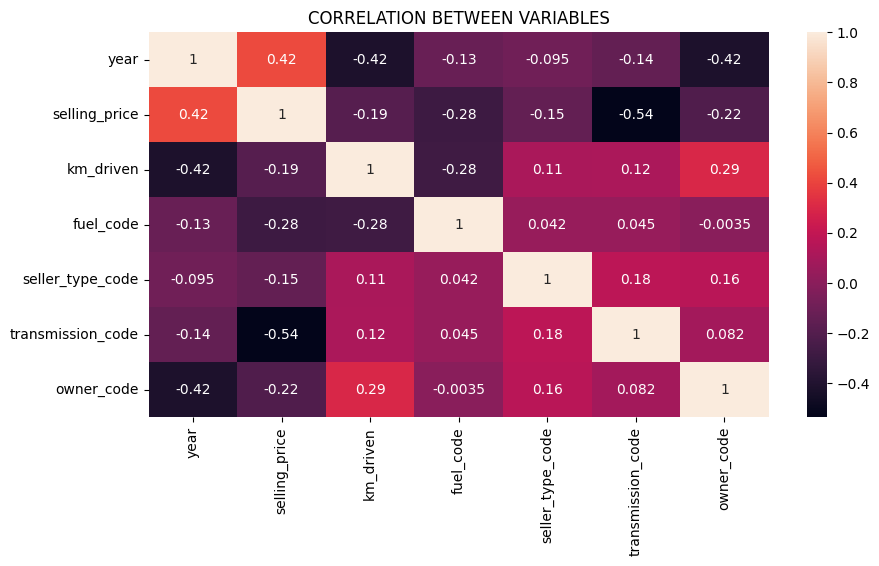

In [32]:
plt.figure(figsize=(10, 5))
sb.heatmap(df2.corr(), annot=True)
plt.title("CORRELATION BETWEEN VARIABLES")
plt.show()

In [33]:
df3['mileage'] = df3['mileage'].str.extract('(\d+)').astype(float)
df3['engine'] = df3['engine'].str.extract('(\d+)').astype(float)
df3['max_power'] = df3['max_power'].str.extract('(\d+)').astype(float)

Removing unit for some features in set 3

C:\Users\htien\AppData\Local\Temp\ipykernel_17344\1478070774.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(df3.corr(), annot=True)


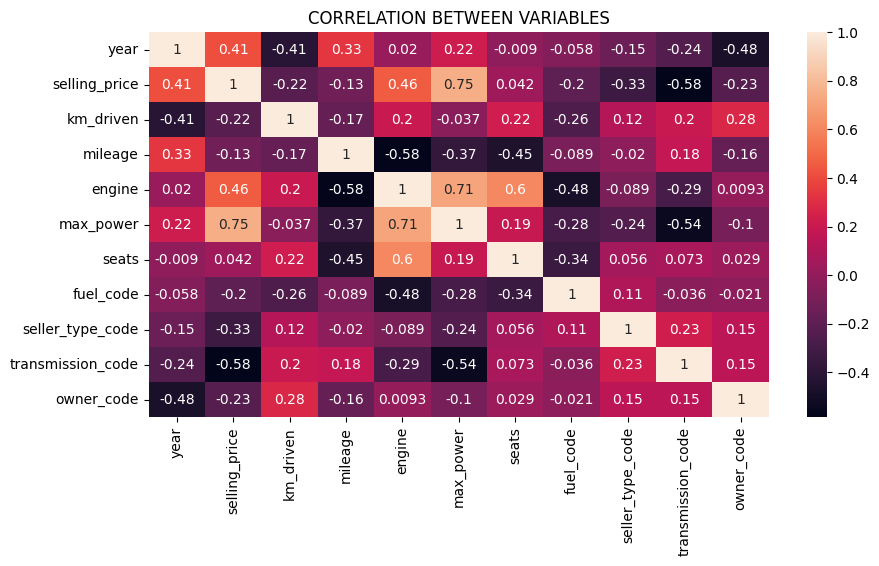

In [34]:
plt.figure(figsize=(10, 5))
sb.heatmap(df3.corr(), annot=True)
plt.title("CORRELATION BETWEEN VARIABLES")
plt.show()

Comparing 2 heatmaps, we can see that 3 extra features in set 3 ('engine', 'max_power') have high correlation with the target 'selling_price'. Although 'mileage' does not have high correlation with 'selling_price', it does have high correlation with others. Because of that, those 3 extra features can have quite impact on the result if we choose to create models on the 3rd dataset.
Therefore, between 2 mentioned solutions, the second solution, which uses the 3rd dataset with some extra features, seem to give better result models will be chosen.
The 1st and 2nd given datasets will be completely ignored in further work. 

In [35]:
df = df3

In [36]:
df['age'] = dt.date.today().year - df.year
df.drop(columns=['year'], inplace=True)

In [37]:
df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,fuel_code,seller_type_code,transmission_code,owner_code,age
0,450000,145500,Diesel,Individual,Manual,First Owner,23.0,1248.0,74.0,5.0,1,1,1,0,8
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.0,1498.0,103.0,5.0,1,1,1,2,8
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.0,1497.0,78.0,5.0,3,1,1,4,16
3,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396.0,90.0,5.0,1,1,1,0,12
4,130000,120000,Petrol,Individual,Manual,First Owner,16.0,1298.0,88.0,5.0,3,1,1,0,15


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7559 entries, 0 to 7558
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   selling_price      7559 non-null   int64   
 1   km_driven          7559 non-null   int64   
 2   fuel               7559 non-null   category
 3   seller_type        7559 non-null   category
 4   transmission       7559 non-null   category
 5   owner              7559 non-null   category
 6   mileage            7360 non-null   float64 
 7   engine             7360 non-null   float64 
 8   max_power          7362 non-null   float64 
 9   seats              7360 non-null   float64 
 10  fuel_code          7559 non-null   int8    
 11  seller_type_code   7559 non-null   int8    
 12  transmission_code  7559 non-null   int8    
 13  owner_code         7559 non-null   int8    
 14  age                7559 non-null   int64   
dtypes: category(4), float64(4), int64(3), int8(4)
memory us

There're some null values in the dataset, so it's needed to remove them

In [39]:
df.dropna(axis=0, inplace=True)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7359 entries, 0 to 7558
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   selling_price      7359 non-null   int64   
 1   km_driven          7359 non-null   int64   
 2   fuel               7359 non-null   category
 3   seller_type        7359 non-null   category
 4   transmission       7359 non-null   category
 5   owner              7359 non-null   category
 6   mileage            7359 non-null   float64 
 7   engine             7359 non-null   float64 
 8   max_power          7359 non-null   float64 
 9   seats              7359 non-null   float64 
 10  fuel_code          7359 non-null   int8    
 11  seller_type_code   7359 non-null   int8    
 12  transmission_code  7359 non-null   int8    
 13  owner_code         7359 non-null   int8    
 14  age                7359 non-null   int64   
dtypes: category(4), float64(4), int64(3), int8(4)
memory us

C:\Users\htien\AppData\Local\Temp\ipykernel_17344\942198276.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(df.corr(), annot=True)


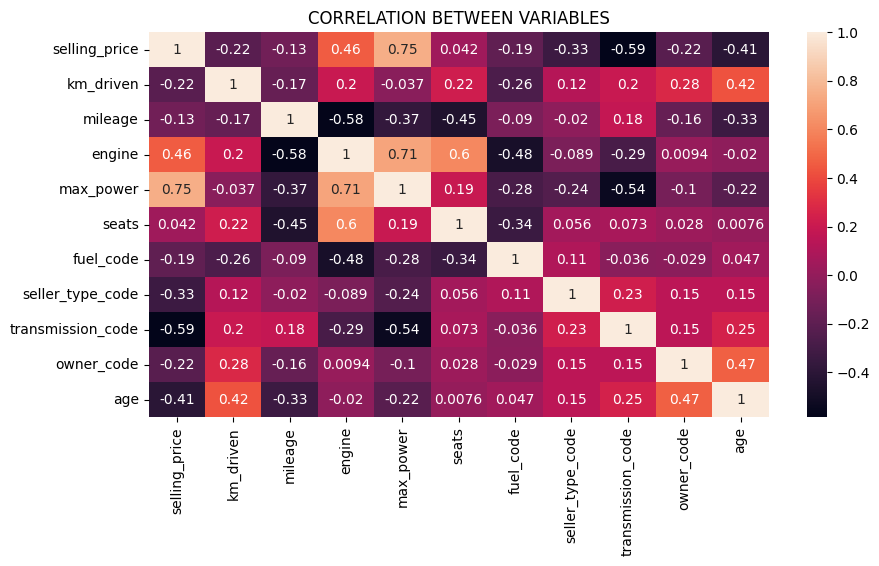

In [41]:
plt.figure(figsize=(10, 5))
sb.heatmap(df.corr(), annot=True)
plt.title("CORRELATION BETWEEN VARIABLES")
plt.show()

First we need to check how values are distributed in the dataset

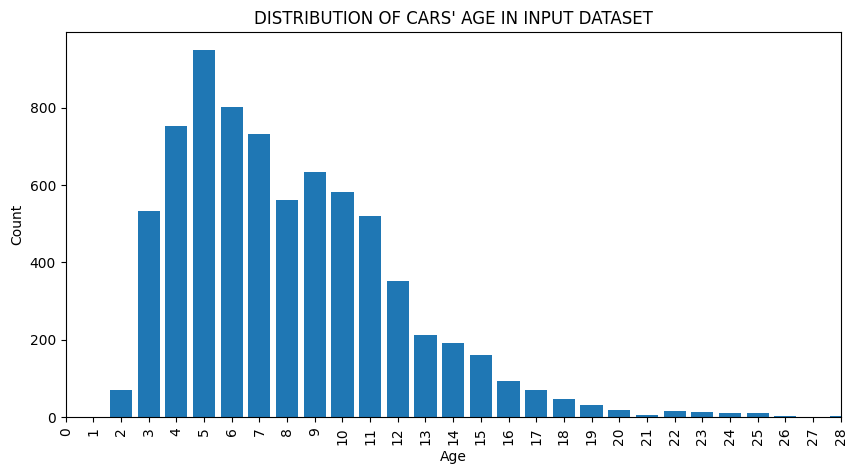

In [42]:
values = []
levels = df['age'].unique()
for level in levels:
    values.append(df['age'].loc[df['age'] == level].count())
fig, ax = plt.subplots(figsize=(10, 5))
plt.bar(levels, values)
plt.xticks(rotation=90)
plt.xlabel("Age")
plt.ylabel("Count")
plt.xlim(0, max(levels))
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.title("DISTRIBUTION OF CARS' AGE IN INPUT DATASET")
plt.show()

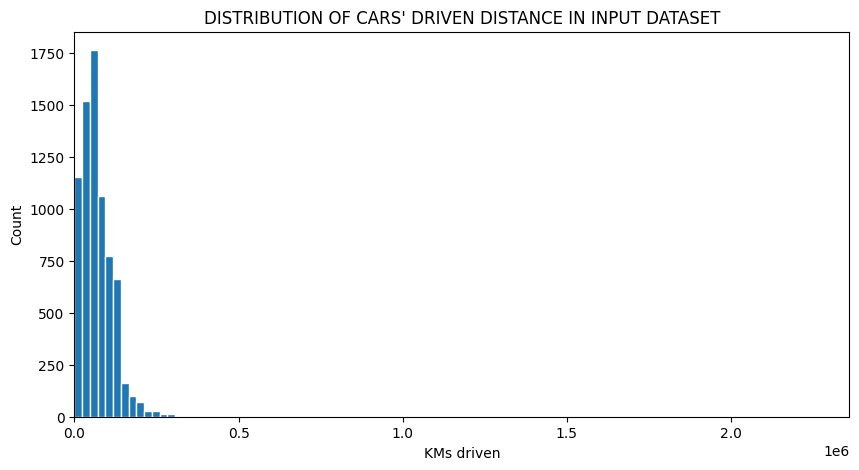

In [43]:
plt.figure(figsize=(10, 5))
bin_number = 100
plt.hist(df.km_driven, bins=bin_number, edgecolor="white")
plt.xlabel("KMs driven")
plt.xlim(0, max(df.km_driven))
plt.ylabel("Count")
plt.title("DISTRIBUTION OF CARS' DRIVEN DISTANCE IN INPUT DATASET")
plt.show()

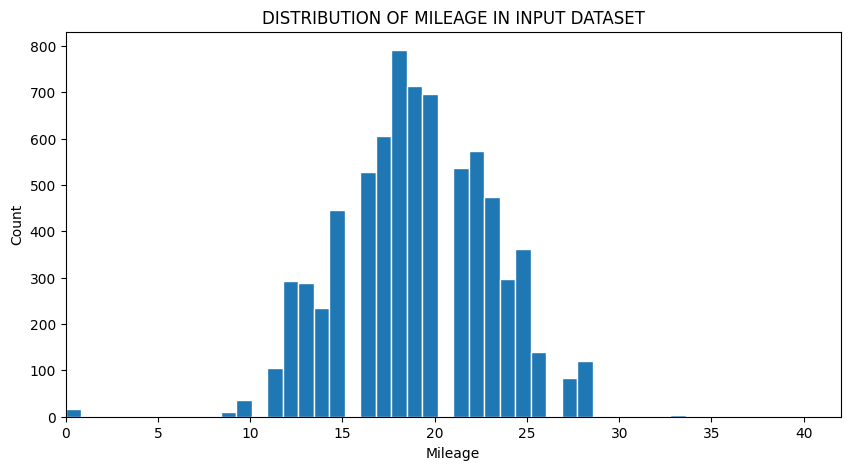

In [44]:
plt.figure(figsize=(10, 5))
bin_number = 50
plt.hist(df.mileage, bins=bin_number, edgecolor="white")
plt.xlabel("Mileage")
plt.xlim(0, max(df.mileage))
plt.ylabel("Count")
plt.title("DISTRIBUTION OF MILEAGE IN INPUT DATASET")
plt.show()

Here we can see that there're some samples with 'mileage' values equal/approximate 0, which is imposible in pratical. So we see them as wrong data and need to remove them.

In [45]:
for x in df.index:
    if df.loc[x, "mileage"] < 5:
        df.drop(x, inplace=True)

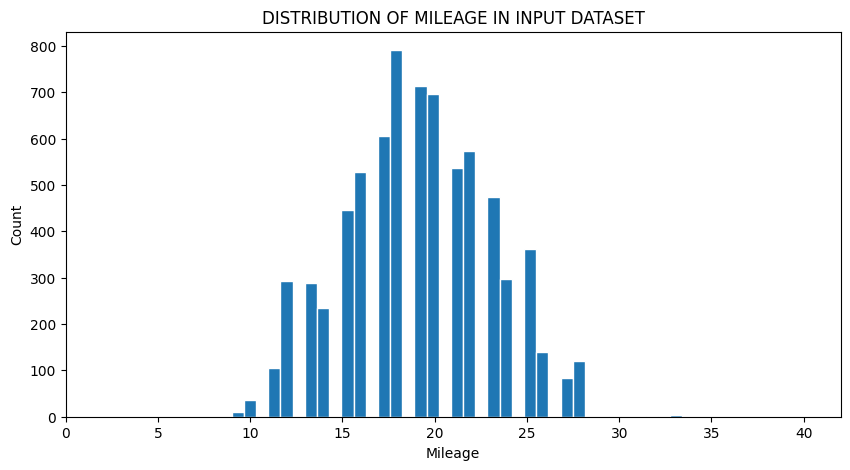

In [46]:
plt.figure(figsize=(10, 5))
bin_number = 50
plt.hist(df.mileage, bins=bin_number, edgecolor="white")
plt.xlabel("Mileage")
plt.xlim(0, max(df.mileage))
plt.ylabel("Count")
plt.title("DISTRIBUTION OF MILEAGE IN INPUT DATASET")
plt.show()

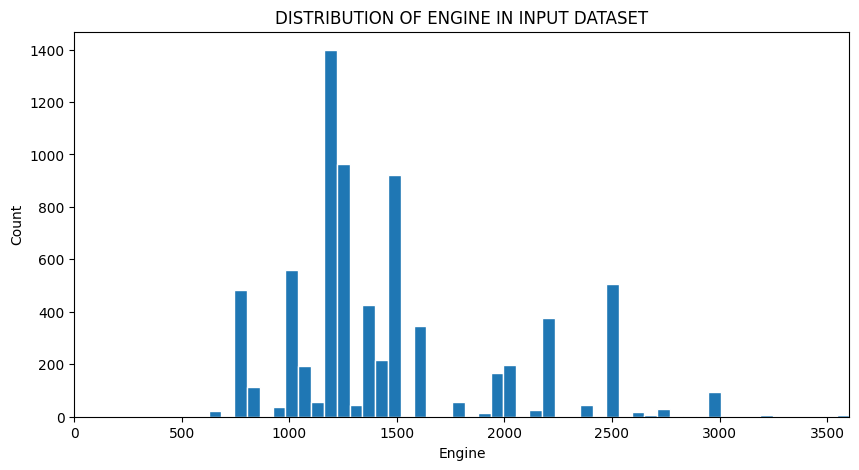

In [47]:
plt.figure(figsize=(10, 5))
bin_number = 50
plt.hist(df.engine, bins=bin_number, edgecolor="white")
plt.xlabel("Engine")
plt.xlim(0, max(df.engine))
plt.ylabel("Count")
plt.title("DISTRIBUTION OF ENGINE IN INPUT DATASET")
plt.show()

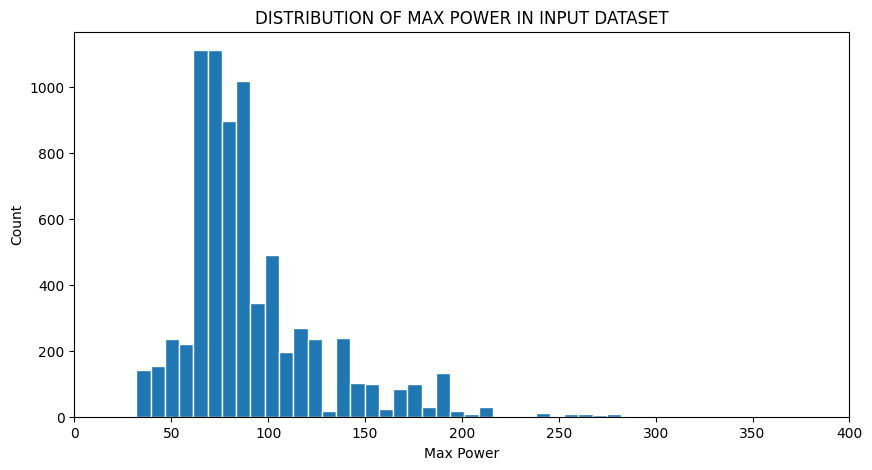

In [48]:
plt.figure(figsize=(10, 5))
bin_number = 50
plt.hist(df.max_power, bins=bin_number, edgecolor="white")
plt.xlabel("Max Power")
plt.xlim(0, max(df.max_power))
plt.ylabel("Count")
plt.title("DISTRIBUTION OF MAX POWER IN INPUT DATASET")
plt.show()

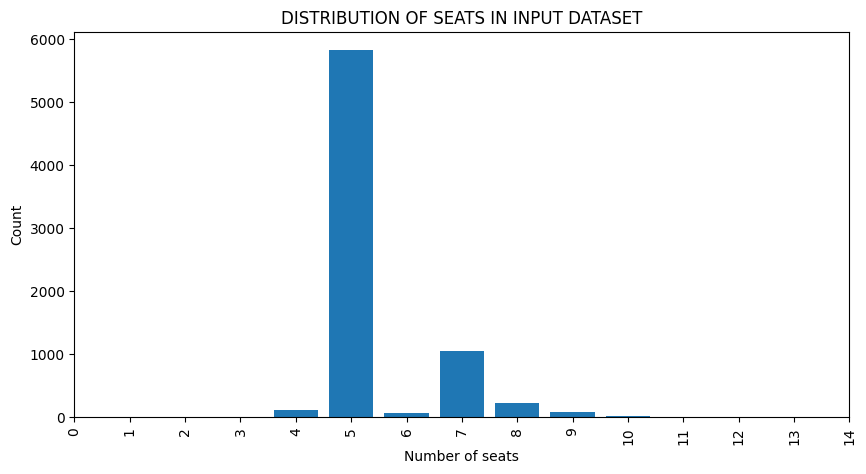

In [49]:
values = []
levels = df['seats'].unique()
for level in levels:
    values.append(df['seats'].loc[df['seats'] == level].count())
fig, ax = plt.subplots(figsize=(10, 5))
plt.bar(levels, values)
plt.xticks(rotation=90)
plt.xlabel("Number of seats")
plt.ylabel("Count")
plt.xlim(0, max(levels))
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.title("DISTRIBUTION OF SEATS IN INPUT DATASET")
plt.show()

In [50]:
fuel = df.fuel.value_counts()
fuel

Diesel    4005
Petrol    3257
CNG         48
LPG         33
Name: fuel, dtype: int64

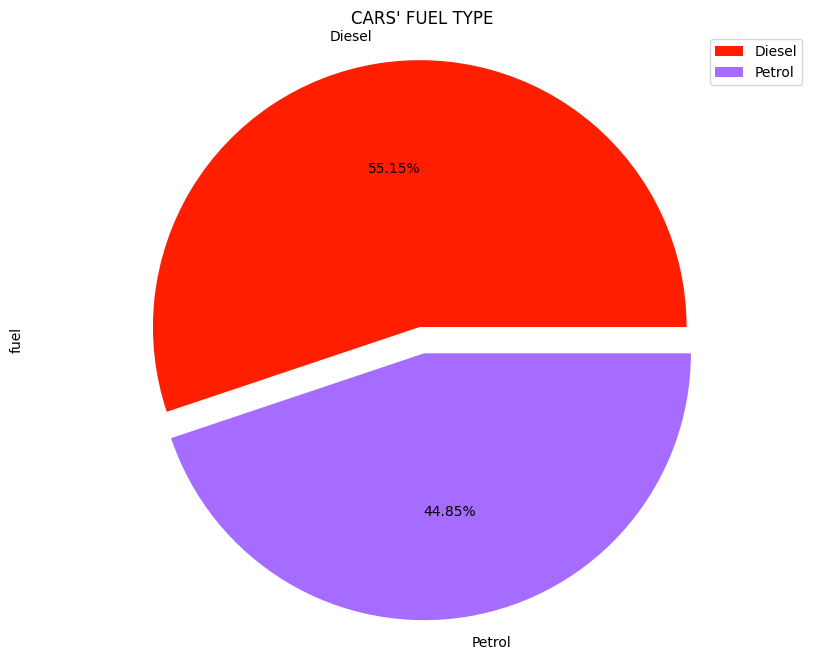

In [51]:
plt.figure(figsize=(10, 8), )
explode = (0.1, 0)
colors = ['#FF1E00', '#A66CFF', '#EAE509', '#D61C4E', '#3CCF4E']

fuel[:2].plot(kind='pie',
                        colors=colors,
                        explode=explode,
                        autopct='%1.2f%%')
plt.axis('equal')
plt.legend(labels=fuel[:2].index, loc="best")
plt.title("CARS' FUEL TYPE")
plt.show()

In [52]:
owner = df.owner.value_counts()
owner

First Owner             4842
Second Owner            1874
Third Owner              479
Fourth & Above Owner     143
Test Drive Car             5
Name: owner, dtype: int64

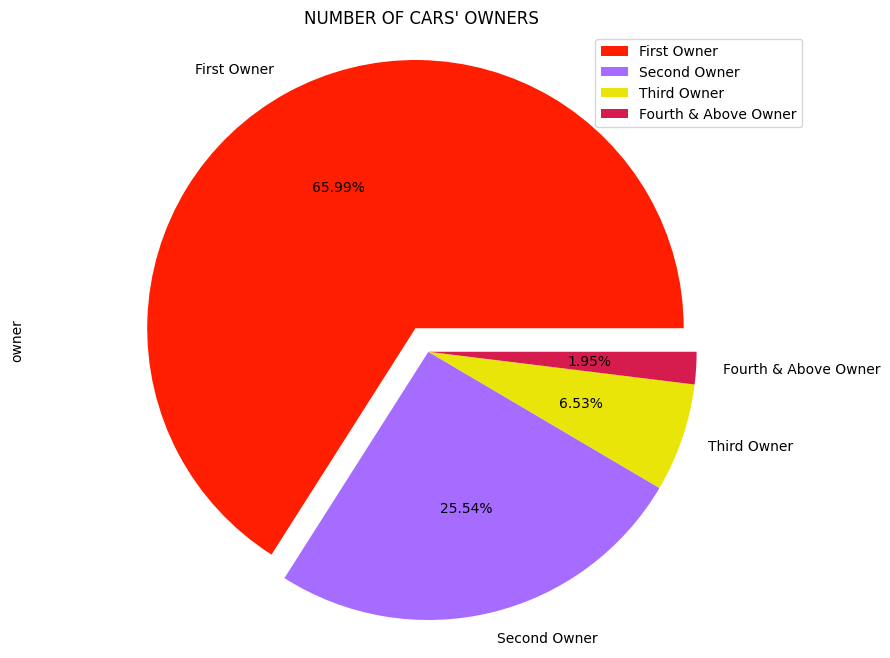

In [53]:
plt.figure(figsize=(10, 8), )
explode = (0.1, 0, 0, 0)
colors = ['#FF1E00', '#A66CFF', '#EAE509', '#D61C4E', '#3CCF4E']

owner[:4].plot(kind='pie',
                        colors=colors,
                        explode=explode,
                        autopct='%1.2f%%')
plt.axis('equal')
plt.legend(labels=owner[:4].index, loc="best")
plt.title("NUMBER OF CARS' OWNERS")
plt.show()

In [54]:
transmission = df.transmission.value_counts()
transmission

Manual       6374
Automatic     969
Name: transmission, dtype: int64

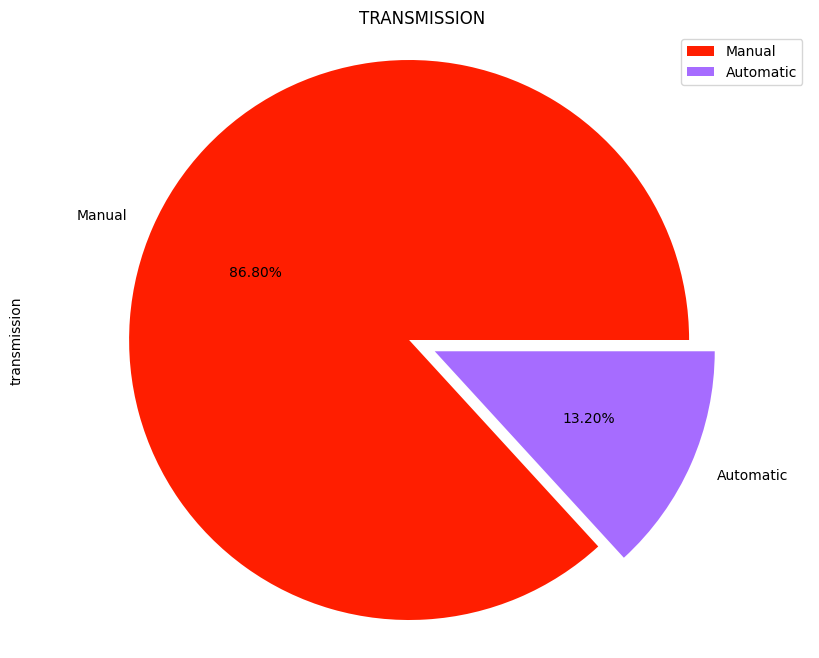

In [55]:
plt.figure(figsize=(10, 8), )
explode = (0.1, 0)
colors = ['#FF1E00', '#A66CFF', '#EAE509', '#D61C4E', '#3CCF4E']

transmission.plot(kind='pie',
                        colors=colors,
                        explode=explode,
                        autopct='%1.2f%%')
plt.axis('equal')
plt.legend(labels=transmission.index, loc="best")
plt.title("TRANSMISSION")
plt.show()

In [56]:
seller_type = df.seller_type.value_counts()
seller_type

Individual          6100
Dealer              1027
Trustmark Dealer     216
Name: seller_type, dtype: int64

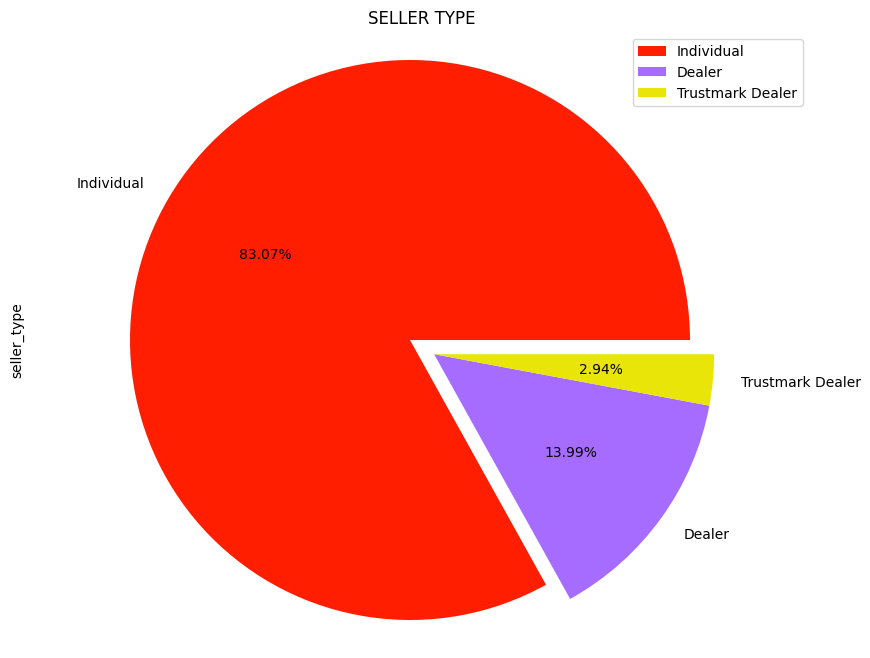

In [57]:
plt.figure(figsize=(10, 8), )
explode = (0.1, 0, 0)
colors = ['#FF1E00', '#A66CFF', '#EAE509', '#D61C4E', '#3CCF4E']

seller_type.plot(kind='pie',
                        colors=colors,
                        explode=explode,
                        autopct='%1.2f%%')
plt.axis('equal')
plt.legend(labels=seller_type.index, loc="best")
plt.title("SELLER TYPE")
plt.show()

[5642, 605, 127]
[458, 422, 89]


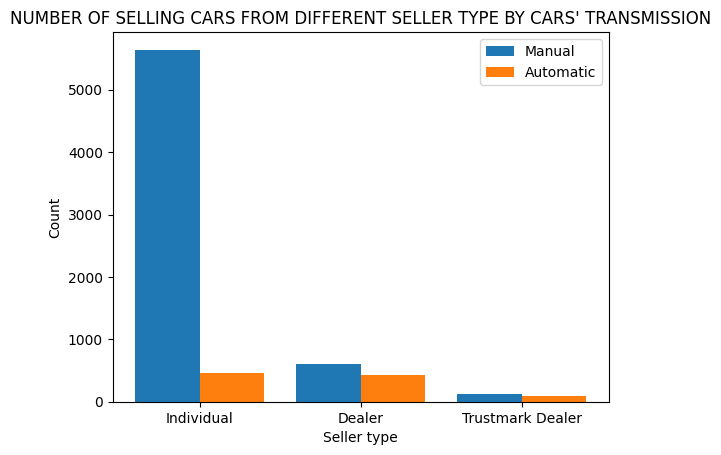

In [58]:
levels = df.seller_type.unique()
values_1 = []
values_2 = []
for level in levels:
    values_1.append(df['seller_type'].loc[df.transmission == 'Manual'].loc[df['seller_type'] == level].count())
    values_2.append(df['seller_type'].loc[df.transmission == 'Automatic'].loc[df['seller_type'] == level].count())
X_axis = np.arange(len(levels))

plt.bar(X_axis - 0.2, values_1, label='Manual', width=0.4)
plt.bar(X_axis + 0.2, values_2, label='Automatic', width=0.4)
print(values_1)
print(values_2)
plt.xticks(X_axis, levels)
plt.xlabel("Seller type")
plt.ylabel("Count")
plt.title("NUMBER OF SELLING CARS FROM DIFFERENT SELLER TYPE BY CARS' TRANSMISSION")
plt.legend()
plt.show()

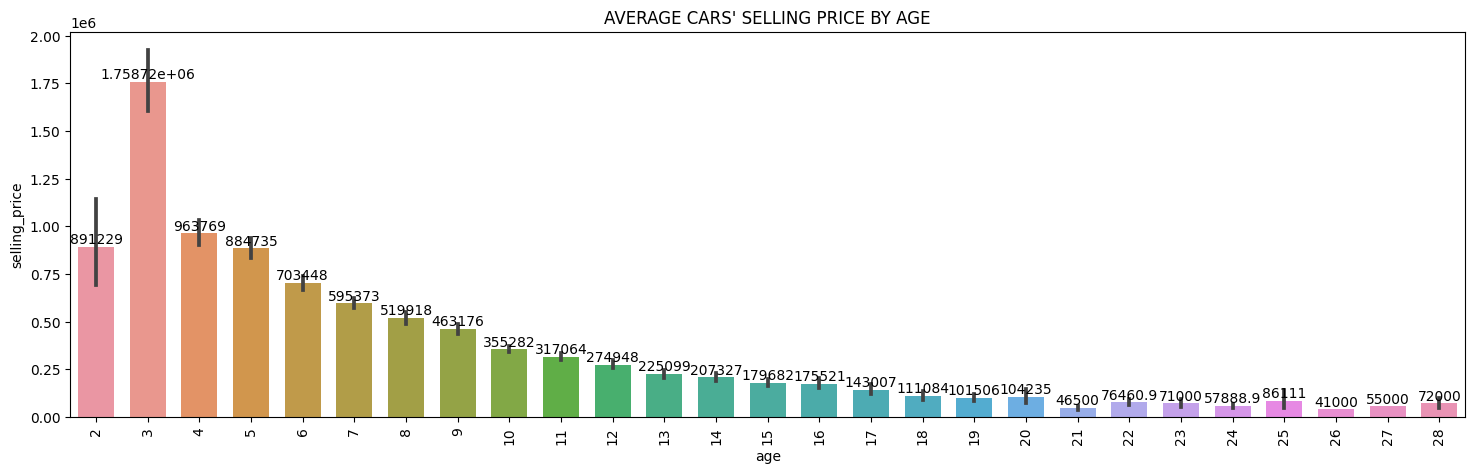

In [59]:
plt.figure(figsize=(18, 5))

ax = sns.barplot(x="age", y="selling_price", data=df, width=0.7)
plt.xticks(rotation=90)
plt.title("AVERAGE CARS' SELLING PRICE BY AGE")

for i in ax.containers:  #to set a label on top of the bars.
    ax.bar_label(i, )

Text(0.5, 1.0, 'AVERAGE SELLING PRICE BY DRIVEN DISTANCE')

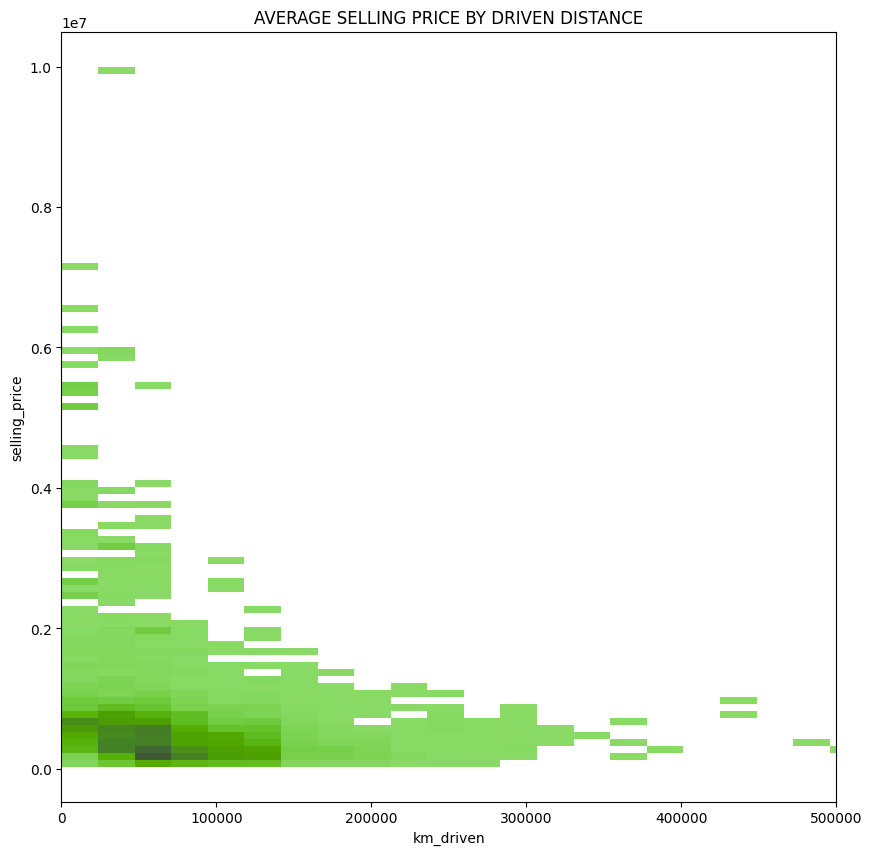

In [60]:
plt.figure(figsize=(10, 10))

ax = sns.histplot(x="km_driven", y="selling_price", data=df, bins=100, color="lawngreen")
plt.xlim(0, 500000)
plt.title("AVERAGE SELLING PRICE BY DRIVEN DISTANCE")

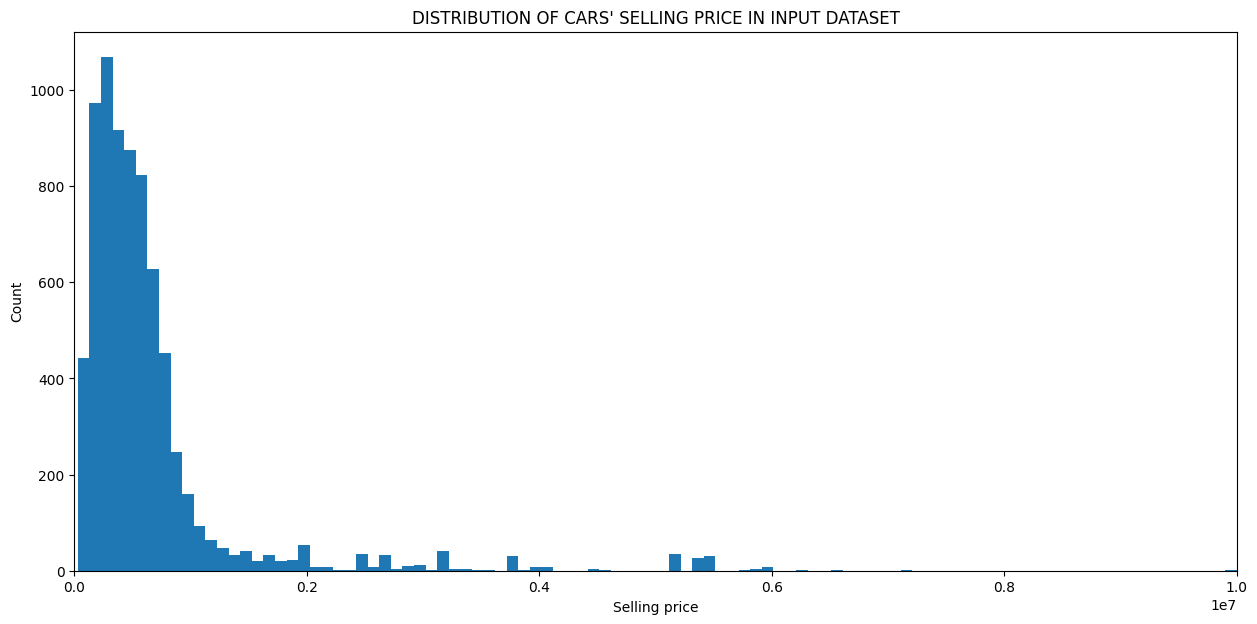

In [61]:
plt.figure(figsize=(15,7))
plt.hist(df.selling_price, bins = 100)
plt.title("DISTRIBUTION OF CARS' SELLING PRICE IN INPUT DATASET")
plt.xlabel("Selling price")
plt.ylabel("Count")
plt.xlim(0, max(df.selling_price))
plt.show()

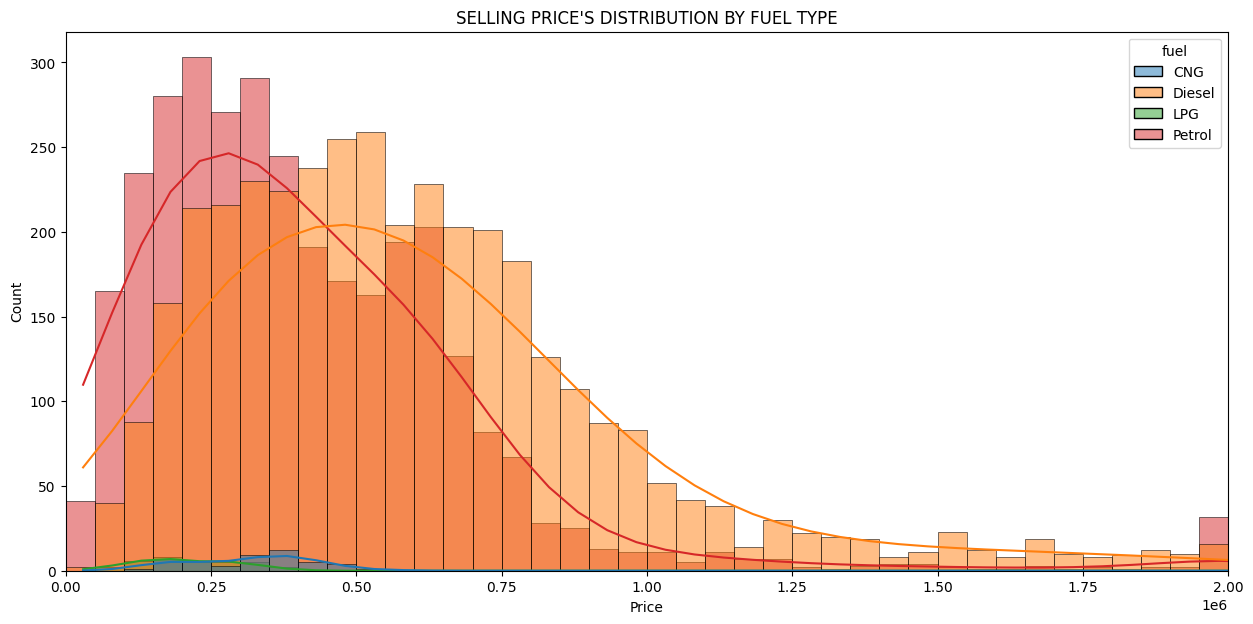

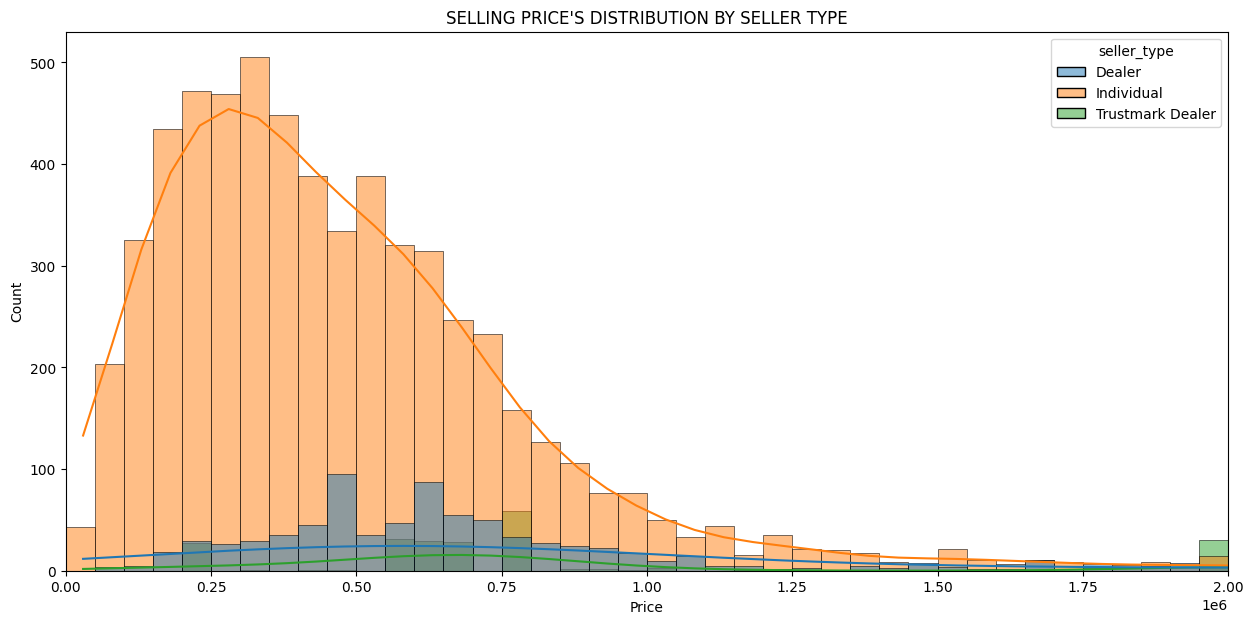

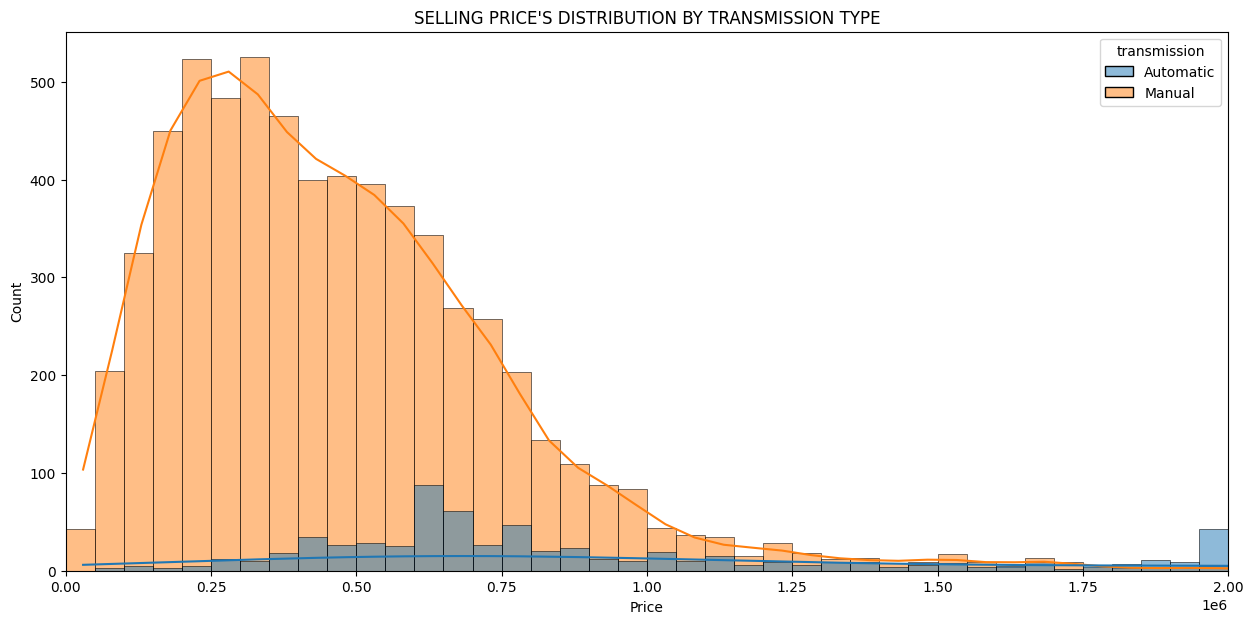

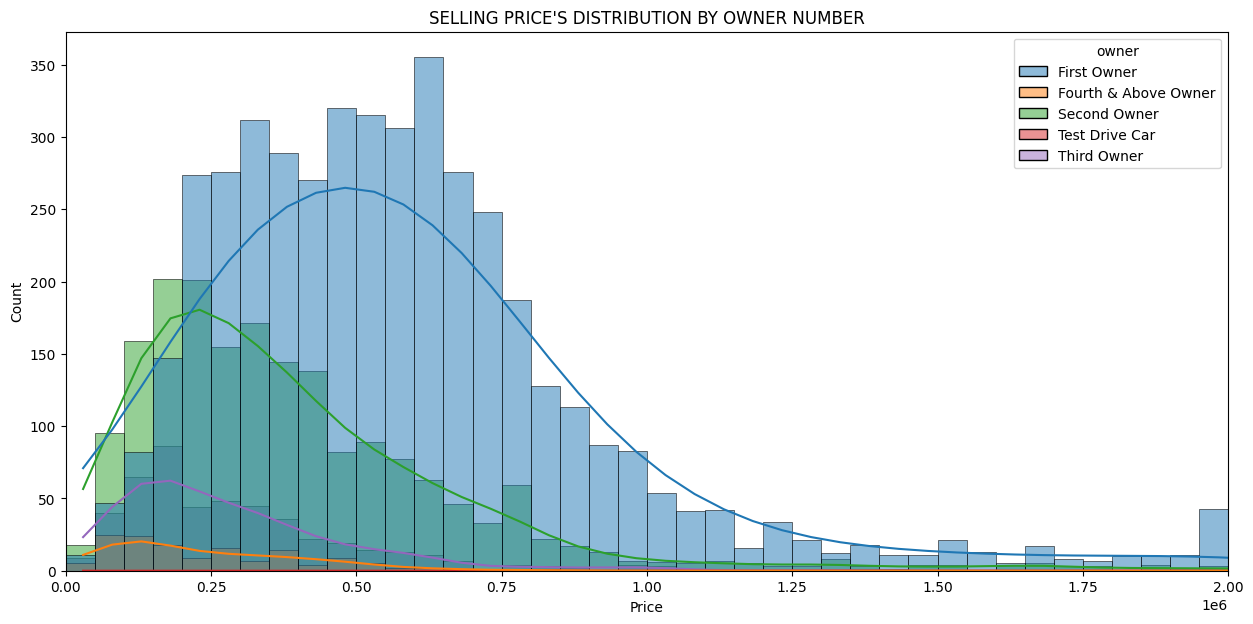

In [62]:
plt.figure(figsize=(15, 7))
sns.histplot(x='selling_price', data=df, kde=True, hue='fuel', bins=40, binrange=(0, 2000000))
plt.xlim(0, 2000000)
plt.xlabel("Price")
plt.ylabel("Count")
plt.title("SELLING PRICE'S DISTRIBUTION BY FUEL TYPE")
plt.show()

plt.figure(figsize=(15, 7))
sns.histplot(x='selling_price', data=df, kde=True, hue='seller_type', bins=40, binrange=(0, 2000000))
plt.xlim(0, 2000000)
plt.xlabel("Price")
plt.ylabel("Count")
plt.title("SELLING PRICE'S DISTRIBUTION BY SELLER TYPE")
plt.show()

plt.figure(figsize=(15, 7))
sns.histplot(x='selling_price', data=df, kde=True, hue='transmission', bins=40, binrange=(0, 2000000))
plt.xlim(0, 2000000)
plt.xlabel("Price")
plt.ylabel("Count")
plt.title("SELLING PRICE'S DISTRIBUTION BY TRANSMISSION TYPE")
plt.show()

plt.figure(figsize=(15, 7))
sns.histplot(x='selling_price', data=df, kde=True, hue='owner', bins=40, binrange=(0, 2000000))
plt.xlim(0, 2000000)
plt.xlabel("Price")
plt.ylabel("Count")
plt.title("SELLING PRICE'S DISTRIBUTION BY OWNER NUMBER")
plt.show()

Text(0.5, 1.0, 'AVERAGE SELLING PRICE BY MILEAGE')

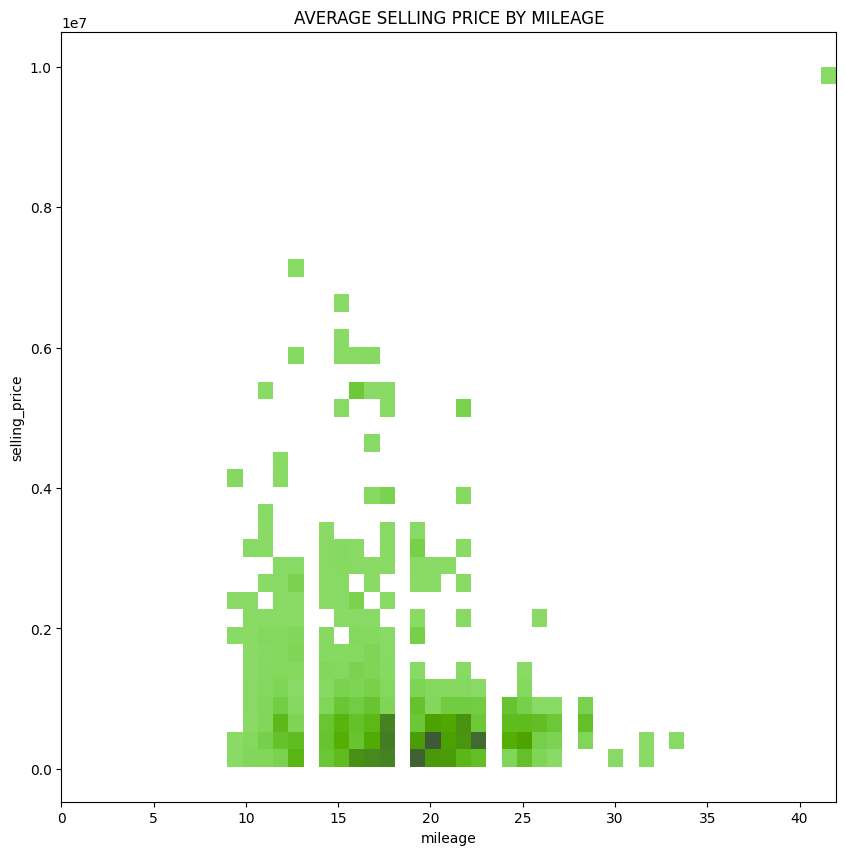

In [63]:
plt.figure(figsize=(10, 10))

ax = sns.histplot(x="mileage", y="selling_price", data=df, bins=40, color="lawngreen")
plt.xlim(0, max(df['mileage']))
plt.title("AVERAGE SELLING PRICE BY MILEAGE")

Text(0.5, 1.0, 'AVERAGE SELLING PRICE BY ENGINE')

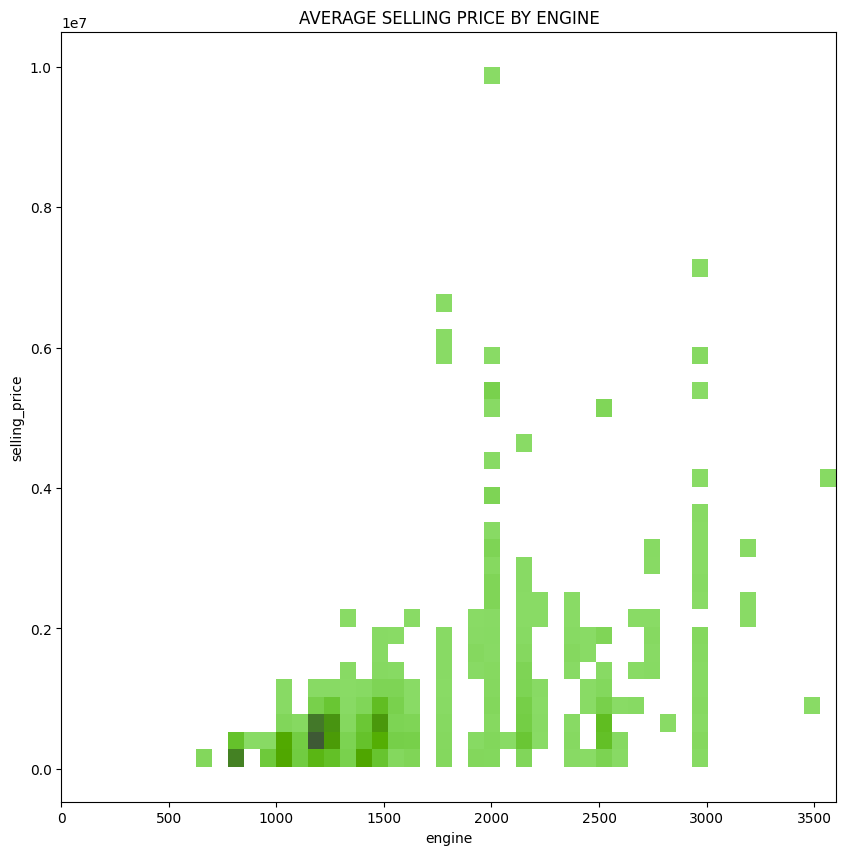

In [64]:
plt.figure(figsize=(10, 10))

ax = sns.histplot(x="engine", y="selling_price", data=df, bins=40, color="lawngreen")
plt.xlim(0, max(df['engine']))
plt.title("AVERAGE SELLING PRICE BY ENGINE")

Text(0.5, 1.0, 'AVERAGE SELLING PRICE BY MAX POWER')

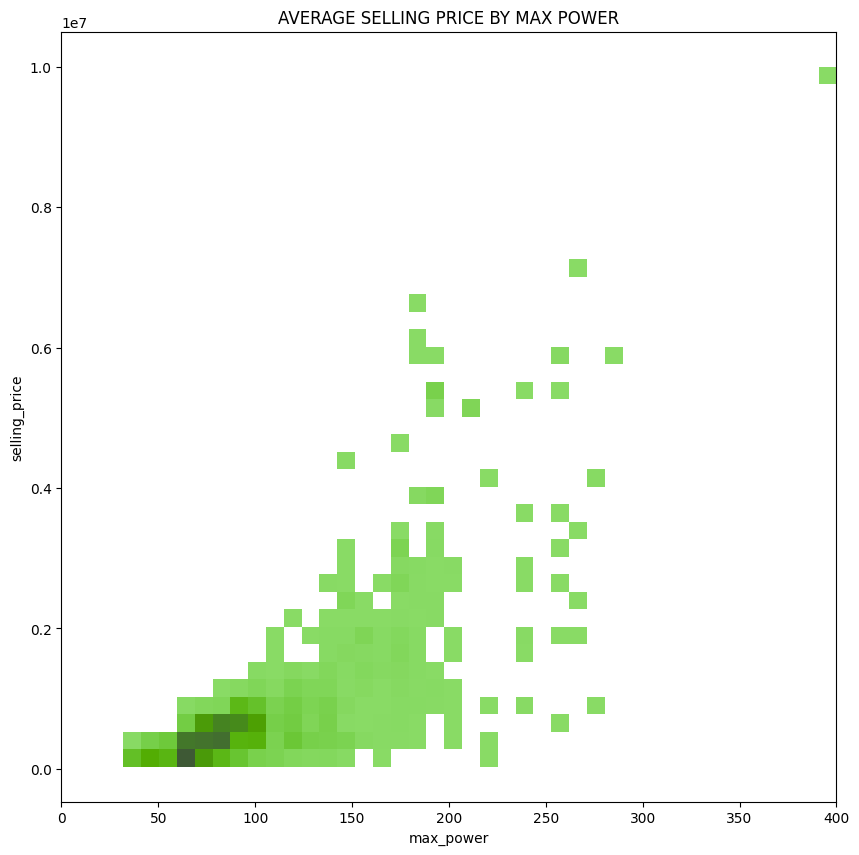

In [65]:
plt.figure(figsize=(10, 10))

ax = sns.histplot(x="max_power", y="selling_price", data=df, bins=40, color="lawngreen")
plt.xlim(0, max(df['max_power']))
plt.title("AVERAGE SELLING PRICE BY MAX POWER")

Conclusions from analysing data step before continuing to other steps:
- Use only 3rd given dataset (Car_detail_v3.csv)
- Correlation between some features is quite high and could lead to bad result with linear models
- Sample values in the dataset are not all distributed followed one rules. Therefore, to get better result normalization data is needed